# practice 4. Logistic Regression 

데이터 셋 링크: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv  
참고자료: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

이 데이터 집합에는 호주 전역의 여러 위치에서 약 10년간의 일일 기상 관측 데이터가 포함되어 있습니다. 내일 비가 올지 여부를 나타낸 RainTomorrow 여부를 예측하는 logistic regression 모델을 학습시키고, 성능을 측정하고, 결과를 해석해보세요.

- Date : 날짜
- Location : 위치
- MinTemp : 최저기온
- MaxTemp : 최고기온
- Rainfall : 강수량
- Evaporation : 증발
- Shnshine : 하루 동안 해가 떠있는 시간
- WindGustDir : 풍향
- WindGustSpped : 풍속
- WindDir9am : 오전 9시 풍향
- WindDir3pm : 오후 3시 풍향
- WindSpeed9am : 오전 9시 풍속
- WindSpeed3pm : 오후 3시 풍속
- Humidity9am : 오전 9시 습도
- Humidity3pm : 오후 3시 습도
- Pressure9am : 오전 9시 해수면 기압
- Pressure3pm : 오후 3시 해수면 기압
- Cloud9am : 오전 9시 구름
- Cloud3pm : 오후 3시 구름
- Temp9am : 오전 9시 기온
- Temp3pm : 오후 3시 기온
- RainToday : 당일 강수 여부

In [463]:
from utils import load_weather_dataset

x_train, x_test, y_train, y_test = load_weather_dataset()

In [464]:
x_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
92882,2016-05-24,GoldCoast,17.7,25.3,0.0,NaN,NaN,SSE,43.0,S,...,24.0,41.0,40.0,1017.6,1015.2,NaN,NaN,23.5,23.2,No
98353,2014-04-23,Adelaide,8.1,20.9,0.0,3.6,9.2,WNW,22.0,NaN,...,9.0,63.0,34.0,1018.8,1014.9,NaN,NaN,14.6,20.1,No
49669,2010-09-08,Tuggeranong,-0.7,14.2,0.0,NaN,NaN,N,33.0,NNE,...,11.0,65.0,40.0,1027.4,1022.6,NaN,NaN,7.6,13.5,No
113818,2015-04-16,Witchcliffe,6.4,20.1,0.0,NaN,NaN,SE,28.0,NaN,...,19.0,72.0,52.0,1033.5,1029.5,NaN,NaN,15.0,19.8,No
50325,2012-07-26,Tuggeranong,2.4,11.9,3.0,NaN,NaN,N,22.0,NNW,...,2.0,85.0,79.0,1015.1,1011.3,NaN,NaN,9.2,10.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41239,2013-11-26,Williamtown,13.9,22.8,5.0,5.2,7.9,SSE,48.0,WSW,...,33.0,52.0,45.0,1015.8,1016.0,6.0,2.0,18.9,21.7,Yes
55985,2011-06-02,Ballarat,3.3,14.7,0.0,NaN,NaN,N,46.0,NNE,...,30.0,84.0,70.0,1026.4,1022.0,2.0,NaN,10.1,13.7,No
32399,2014-06-01,Sydney,14.8,20.7,11.2,5.0,0.4,W,46.0,NW,...,26.0,87.0,70.0,1020.5,1018.0,7.0,8.0,17.0,17.8,Yes
82584,2013-08-03,Dartmoor,5.0,13.5,2.2,1.4,4.8,WNW,61.0,N,...,20.0,95.0,79.0,1009.9,1006.5,NaN,NaN,9.4,13.4,Yes


In [ ]:
x_train.columns

In [ ]:
x_train.info()

In [ ]:
x_train.isnull().sum()

In [465]:
import pandas as pd

x_train['Date'] = pd.to_datetime(x_train['Date'])

x_train['Year'] = x_train['Date'].dt.year
x_train['Month'] = x_train['Date'].dt.month
x_train['Day'] = x_train['Date'].dt.day

x_train.drop('Date',axis=1,inplace=True)

In [466]:
x_test['Date'] = pd.to_datetime(x_test['Date'])

x_test['Year'] = x_test['Date'].dt.year
x_test['Month'] = x_test['Date'].dt.month
x_test['Day'] = x_test['Date'].dt.day

x_test.drop('Date',axis=1,inplace=True)

In [467]:
continuous = list(x_train.select_dtypes(include=('float','int')).columns)
categorical = list(x_train.select_dtypes(include='object').columns)

In [ ]:
x_train[continuous].isnull().sum()

In [468]:
for i in continuous:
    x_train[i] = x_train[i].fillna(x_train.groupby(['Location','Month'])[i].transform('mean'))
    x_train[i] = x_train[i].fillna(x_train.groupby(['Location'])[i].transform('mean'))
    x_train[i] = x_train[i].fillna(x_train.groupby(['Month'])[i].transform('mean'))
    x_test[i] = x_test[i].fillna(x_test.groupby(['Location','Month'])[i].transform('mean'))
    x_test[i] = x_test[i].fillna(x_test.groupby(['Location'])[i].transform('mean'))
    x_test[i] = x_test[i].fillna(x_test.groupby(['Month'])[i].transform('mean'))


In [ ]:
x_train[continuous].isnull().sum()

In [ ]:
x_test[continuous].isnull().sum()

===========================================================================================================

In [418]:
import numpy as np
import math

In [419]:
x_train[categorical].isnull().sum()

Location          0
WindGustDir    8244
WindDir9am     8425
WindDir3pm     3394
RainToday      2627
dtype: int64

In [469]:
wind_dict = x_train.groupby(["Location", "Month"])['WindGustDir'].agg(pd.Series.mode).to_dict()

In [470]:
for i in categorical:
    wind_dict = x_train.groupby(["Location", "Month"])[i].agg(pd.Series.mode).to_dict()
    for k, v in wind_dict.items():
        if isinstance(v, np.ndarray):
            city,month = k
            result = x_train[x_train['Month'] == month][i].mode().iloc[0]
            if len(v) == 0:
                wind_dict[k] = result
            elif len(v) >= 2:
                wind_dict[k] = v[0]
    
    def most_common_wind(x):
        wind = x[i]
        if isinstance(wind, str):
            return wind
        if not math.isnan(wind): 
            return wind
        location = x["Location"]
        month = x["Month"]
        wind = wind_dict[(location, month)]
        return wind            
    
    x_train[i] = x_train.apply(most_common_wind, axis=1)

In [471]:
for i in categorical:
    wind_dict = x_test.groupby(["Location", "Month"])[i].agg(pd.Series.mode).to_dict()
    for k, v in wind_dict.items():
        if isinstance(v, np.ndarray):
            city,month = k
            result = x_test[x_test['Month'] == month][i].mode().iloc[0]
            if len(v) == 0:
                wind_dict[k] = result
            elif len(v) >= 2:
                wind_dict[k] = v[0]
    
    def most_common_wind(x):
        wind = x[i]
        if isinstance(wind, str):
            return wind
        if not math.isnan(wind): 
            return wind
        location = x["Location"]
        month = x["Month"]
        wind = wind_dict[(location, month)]
        return wind            
    
    x_test[i] = x_test.apply(most_common_wind, axis=1)

In [ ]:
x_train.isnull().sum()

In [ ]:
x_test.isnull().sum()

In [475]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
92882,17.7,25.3,0.0,3.126921,6.364134,43.0,31.0,24.0,41.0,40.0,...,0,1,0,0,0,0,0,0,1,0
98353,8.1,20.9,0.0,3.600000,9.200000,22.0,0.0,9.0,63.0,34.0,...,0,0,0,1,0,0,0,0,1,0
49669,-0.7,14.2,0.0,4.878482,7.760791,33.0,4.0,11.0,65.0,40.0,...,0,0,0,0,0,0,0,0,1,0
113818,6.4,20.1,0.0,4.440663,7.153848,28.0,0.0,19.0,72.0,52.0,...,0,0,1,0,0,0,0,0,1,0
50325,2.4,11.9,3.0,2.734669,6.073817,22.0,7.0,2.0,85.0,79.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41239,13.9,22.8,5.0,5.200000,7.900000,48.0,17.0,33.0,52.0,45.0,...,0,0,1,0,0,0,0,0,0,1
55985,3.3,14.7,0.0,2.413858,5.645518,46.0,28.0,30.0,84.0,70.0,...,0,0,0,0,0,0,0,0,1,0
32399,14.8,20.7,11.2,5.000000,0.400000,46.0,7.0,26.0,87.0,70.0,...,0,0,0,0,0,1,0,0,0,1
82584,5.0,13.5,2.2,1.400000,4.800000,61.0,20.0,20.0,95.0,79.0,...,0,0,0,0,0,1,0,0,0,1


In [474]:
for i in categorical:
    onehot = pd.get_dummies(x_train[i],prefix=i).astype(int)
    x_train = pd.concat([x_train,onehot],axis=1)
    x_train.drop([i],axis=1,inplace=True)

In [476]:
for i in categorical:
    onehot = pd.get_dummies(x_test[i],prefix=i).astype(int)
    x_test = pd.concat([x_test,onehot],axis=1)
    x_test.drop([i],axis=1,inplace=True)

In [480]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
92882,17.7,25.3,0.0,3.126921,6.364134,43.0,31.0,24.0,41.0,40.0,...,0,1,0,0,0,0,0,0,1,0
98353,8.1,20.9,0.0,3.600000,9.200000,22.0,0.0,9.0,63.0,34.0,...,0,0,0,1,0,0,0,0,1,0
49669,-0.7,14.2,0.0,4.878482,7.760791,33.0,4.0,11.0,65.0,40.0,...,0,0,0,0,0,0,0,0,1,0
113818,6.4,20.1,0.0,4.440663,7.153848,28.0,0.0,19.0,72.0,52.0,...,0,0,1,0,0,0,0,0,1,0
50325,2.4,11.9,3.0,2.734669,6.073817,22.0,7.0,2.0,85.0,79.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41239,13.9,22.8,5.0,5.200000,7.900000,48.0,17.0,33.0,52.0,45.0,...,0,0,1,0,0,0,0,0,0,1
55985,3.3,14.7,0.0,2.413858,5.645518,46.0,28.0,30.0,84.0,70.0,...,0,0,0,0,0,0,0,0,1,0
32399,14.8,20.7,11.2,5.000000,0.400000,46.0,7.0,26.0,87.0,70.0,...,0,0,0,0,0,1,0,0,0,1
82584,5.0,13.5,2.2,1.400000,4.800000,61.0,20.0,20.0,95.0,79.0,...,0,0,0,0,0,1,0,0,0,1


In [495]:
len(continuous)

19

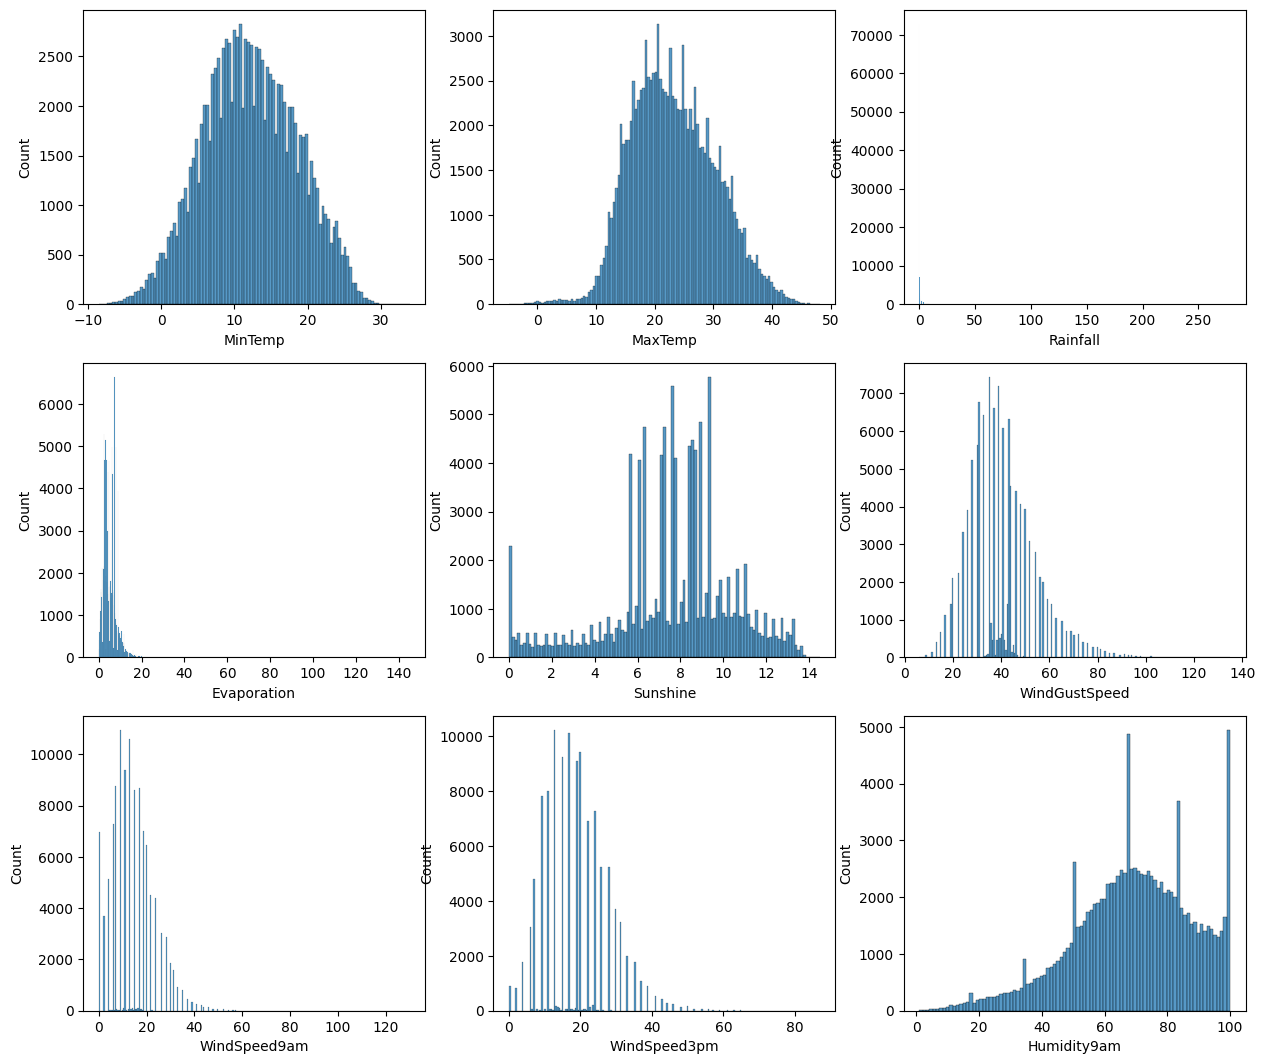

In [484]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,13))

for i,variable in enumerate(continuous):
    if i == 9:
        break
    plt.subplot(3,3,i+1)
    sns.histplot(data = x_train, x= variable)

mintemp,maxtemp,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm = standard scaling
rainfall,evaporation,sunshine,cloud9am,cloud3pm = minmax scaling

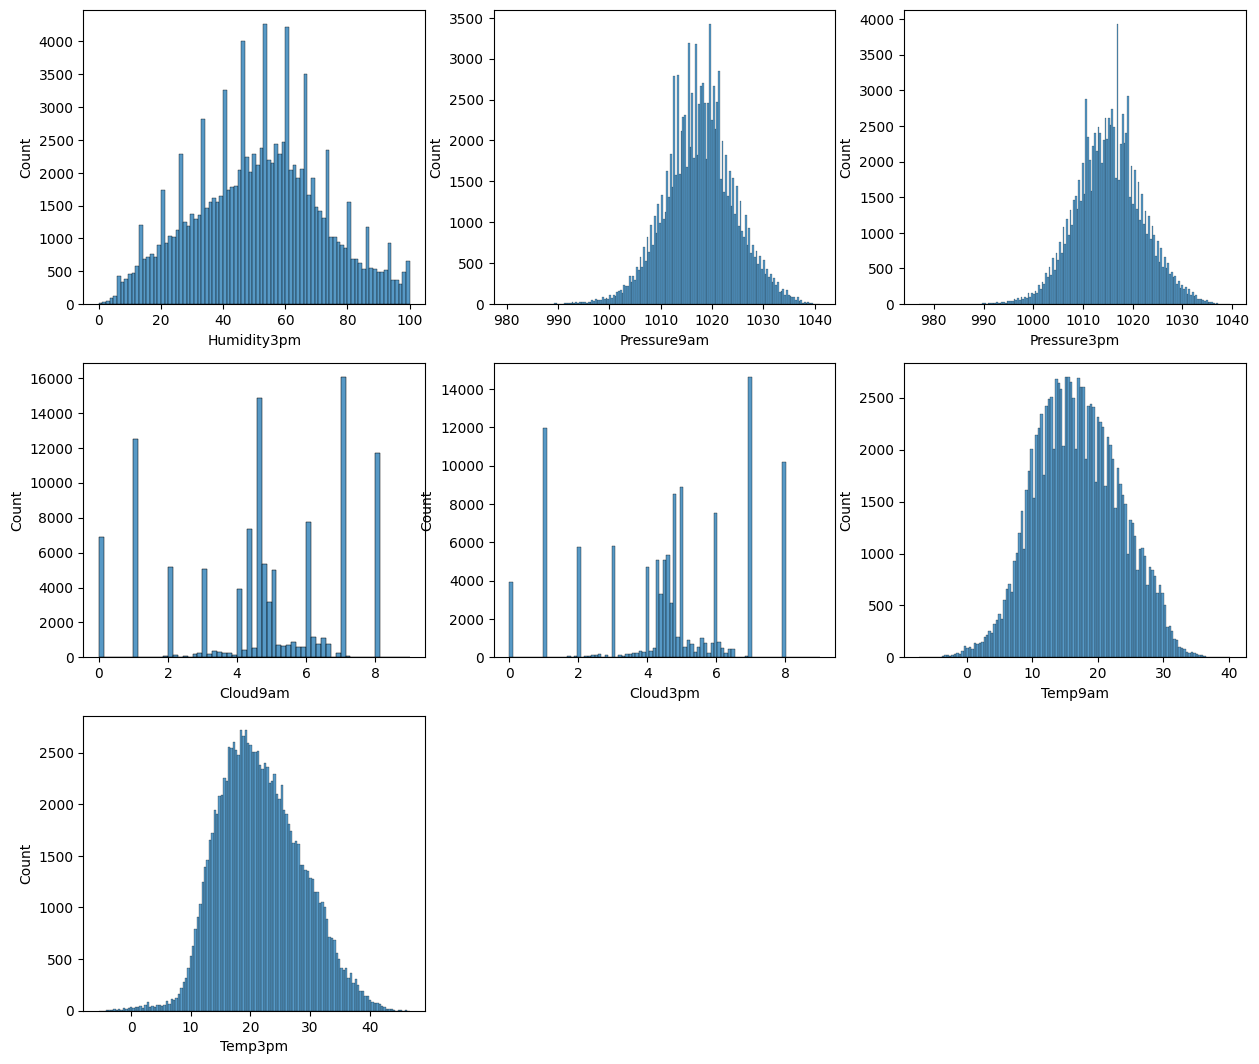

In [497]:
plt.figure(figsize=(15,13))

for i,variable in enumerate(continuous):
    if i < 9 or i > 15:
        continue
    plt.subplot(3,3,i-8)
    sns.histplot(data = x_train, x= variable)

In [ ]:
stand